In [21]:
!pip install seaborn

In [40]:
import pandas as pd
import seaborn as sns

df_ratings = pd.read_csv('./ml-latest-small/ratings.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [30]:
#rating count

df_ratings['rating'].value_counts().sort_index()

0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64

In [31]:
mean_ratings = df_ratings['rating'].mean()

median_ratings = df_ratings['rating'].median()

print(f'Rating\nMean: {mean_ratings}\nMedian: {median_ratings}')

Rating
Mean: 3.501556983616962
Median: 3.5


<AxesSubplot: ylabel='Frequency'>

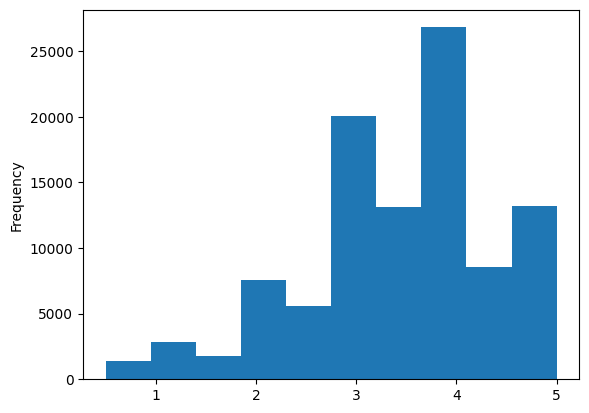

In [32]:
df_ratings['rating'].plot(kind='hist')

<AxesSubplot: >

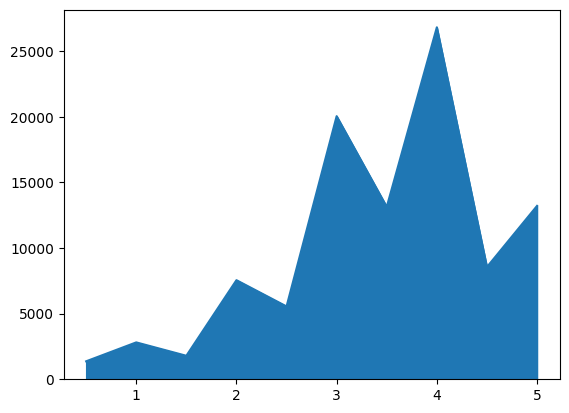

In [33]:
df_ratings['rating'].value_counts().sort_index().plot(kind='area')

<AxesSubplot: ylabel='rating'>

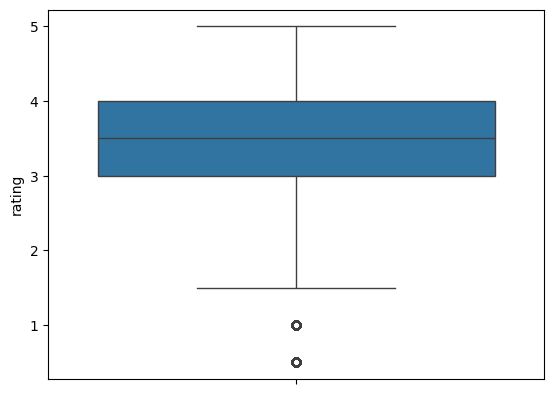

In [34]:
sns.boxplot(df_ratings['rating'])

In [38]:
df_movies = pd.read_csv('./ml-latest-small/movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [41]:
df_ratings.query('movieId==1')

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [52]:
df_movies_group = df_ratings.groupby('movieId')
df_movies_means = df_movies_group['rating'].mean()
df_movies_means

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

<AxesSubplot: ylabel='Frequency'>

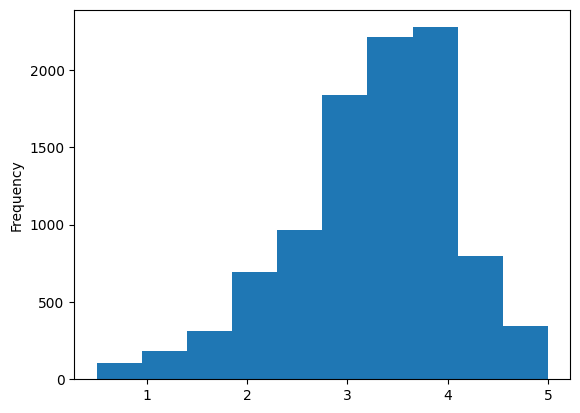

In [53]:
df_movies_means.plot(kind='hist')

In [69]:
top_10_movies = df_movies_means.sort_values(ascending=False).head(10)
top_10_movies.index

[88448, 100556, 143031, 143511, 143559, 6201, 102217, 102084, 6192, 145994]

In [72]:
df_movies.loc[df_movies['movieId'].isin(top_10_movies.index)]

,movieId,title,genres
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance
4251,6201,Lady Jane (1986),Drama|Romance
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama
8107,100556,"Act of Killing, The (2012)",Documentary
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy
8154,102217,Bill Hicks: Revelations (1993),Comedy
9083,143031,Jump In! (2007),Comedy|Drama|Romance
9094,143511,Human (2015),Documentary
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy
9122,145994,Formula of Love (1984),Comedy
